In [1]:
from IPython.display import Image

# Using Predictive Modeling to Identify Key Test Parameters

It is not necessarily obvious which subcomponents in our product will be most useful in predicting final assembled performance, and while theory can help us to establish specifications we want to empirically derive them. Additionally, there may be hidden interplay between multiple parameters that lends us insights into the nature of the test and measurement schema. Finally, we want to do our work cost-effectively and minimize test and inspection times. If it is possible to bypass certain measurements which are unrelated to final assembled product performance then we'd like to eliminate those steps to save time and therefore money.

The model exploration was executed in the alternative notebook (Predictive Model Comparison.ipynb) in this GitHub page:
https://github.com/geoffreysitwell/Capstone_Module24

This summary considers some of the results from the Predictive Model Comparison and why Logistic Regression is the most appropriate choice for these data, then applies it and considers results and conclusions.

## Overview of the Problem

Our primary product is assembled from two primary subcomponents, A and B. One subcomponent A is integrated with 5 of subcomponent B and each of these 6 subcomponents is indepedently tested and inspected. It is a significant effort to ensure the goodness of each component in advance of assembling the final product and it would be very good value to determine which of these inspections and tests are critical and which can be omitted.

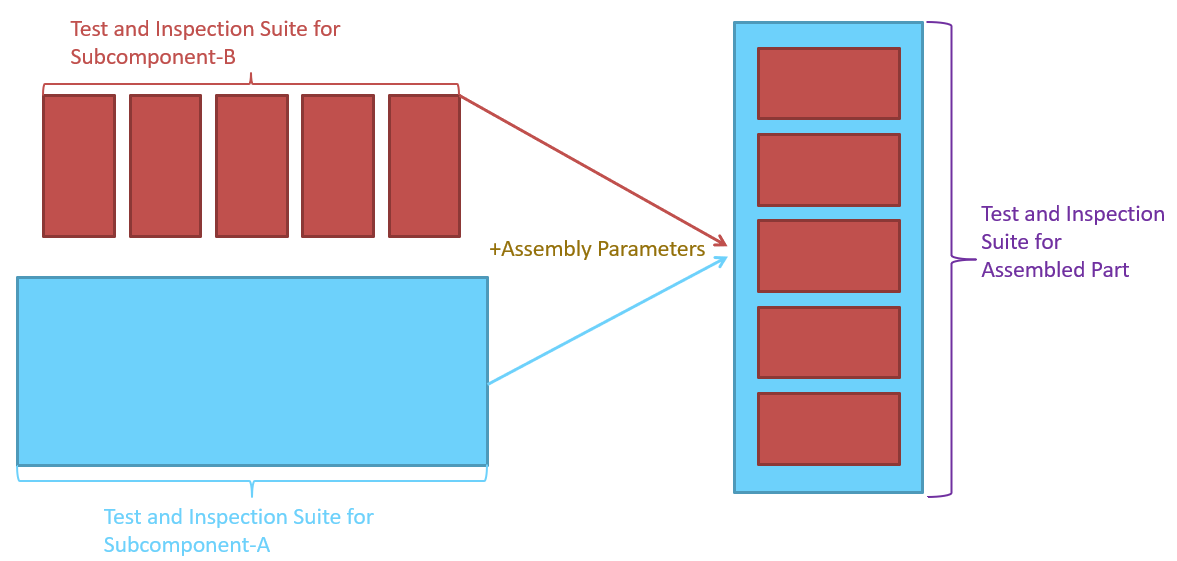

In [7]:
Image(filename='PresentationMaterials/CartoonDiagram.png') 

This analysis has considered only the section in **<span style="color:purple">purple</span>**, the test and inspection suite for the wholly assembled part. This is the most basic method of the anlaysis. Ultimately the advantage of using machine-learning and artificial intelligence would be to integrate all the data, including test and inspection suites for each of the subcomponents and the assembly parameters  but this was beyond the scope of the course timeline. 

Ideally the algorithms would be able to identify relationships between the variables that may not be obvious from theory and help to distinguish the critical from the non-critical tests and inspections.

## Conclusions of the Predictive Model Comparison

Before diving into the conclusions let's review an example of the results table:

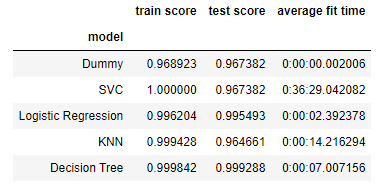

In [2]:
Image(filename='Test_Time_Tables/SecondPassResults.png') 

### 1) Decision Tree Model

As mentioned in the ReadME file for this GitHub page, "The model with the highest score is the Decision Tree model, but it is likely inappropriate for this exercise since it is probable that it will just find prescribed pass/fail thresholds." I wanted to investigate this belief further and so compared the branches in the Decision Tree against what I know to be the prescribed thresholds for the pass/fail criteria.

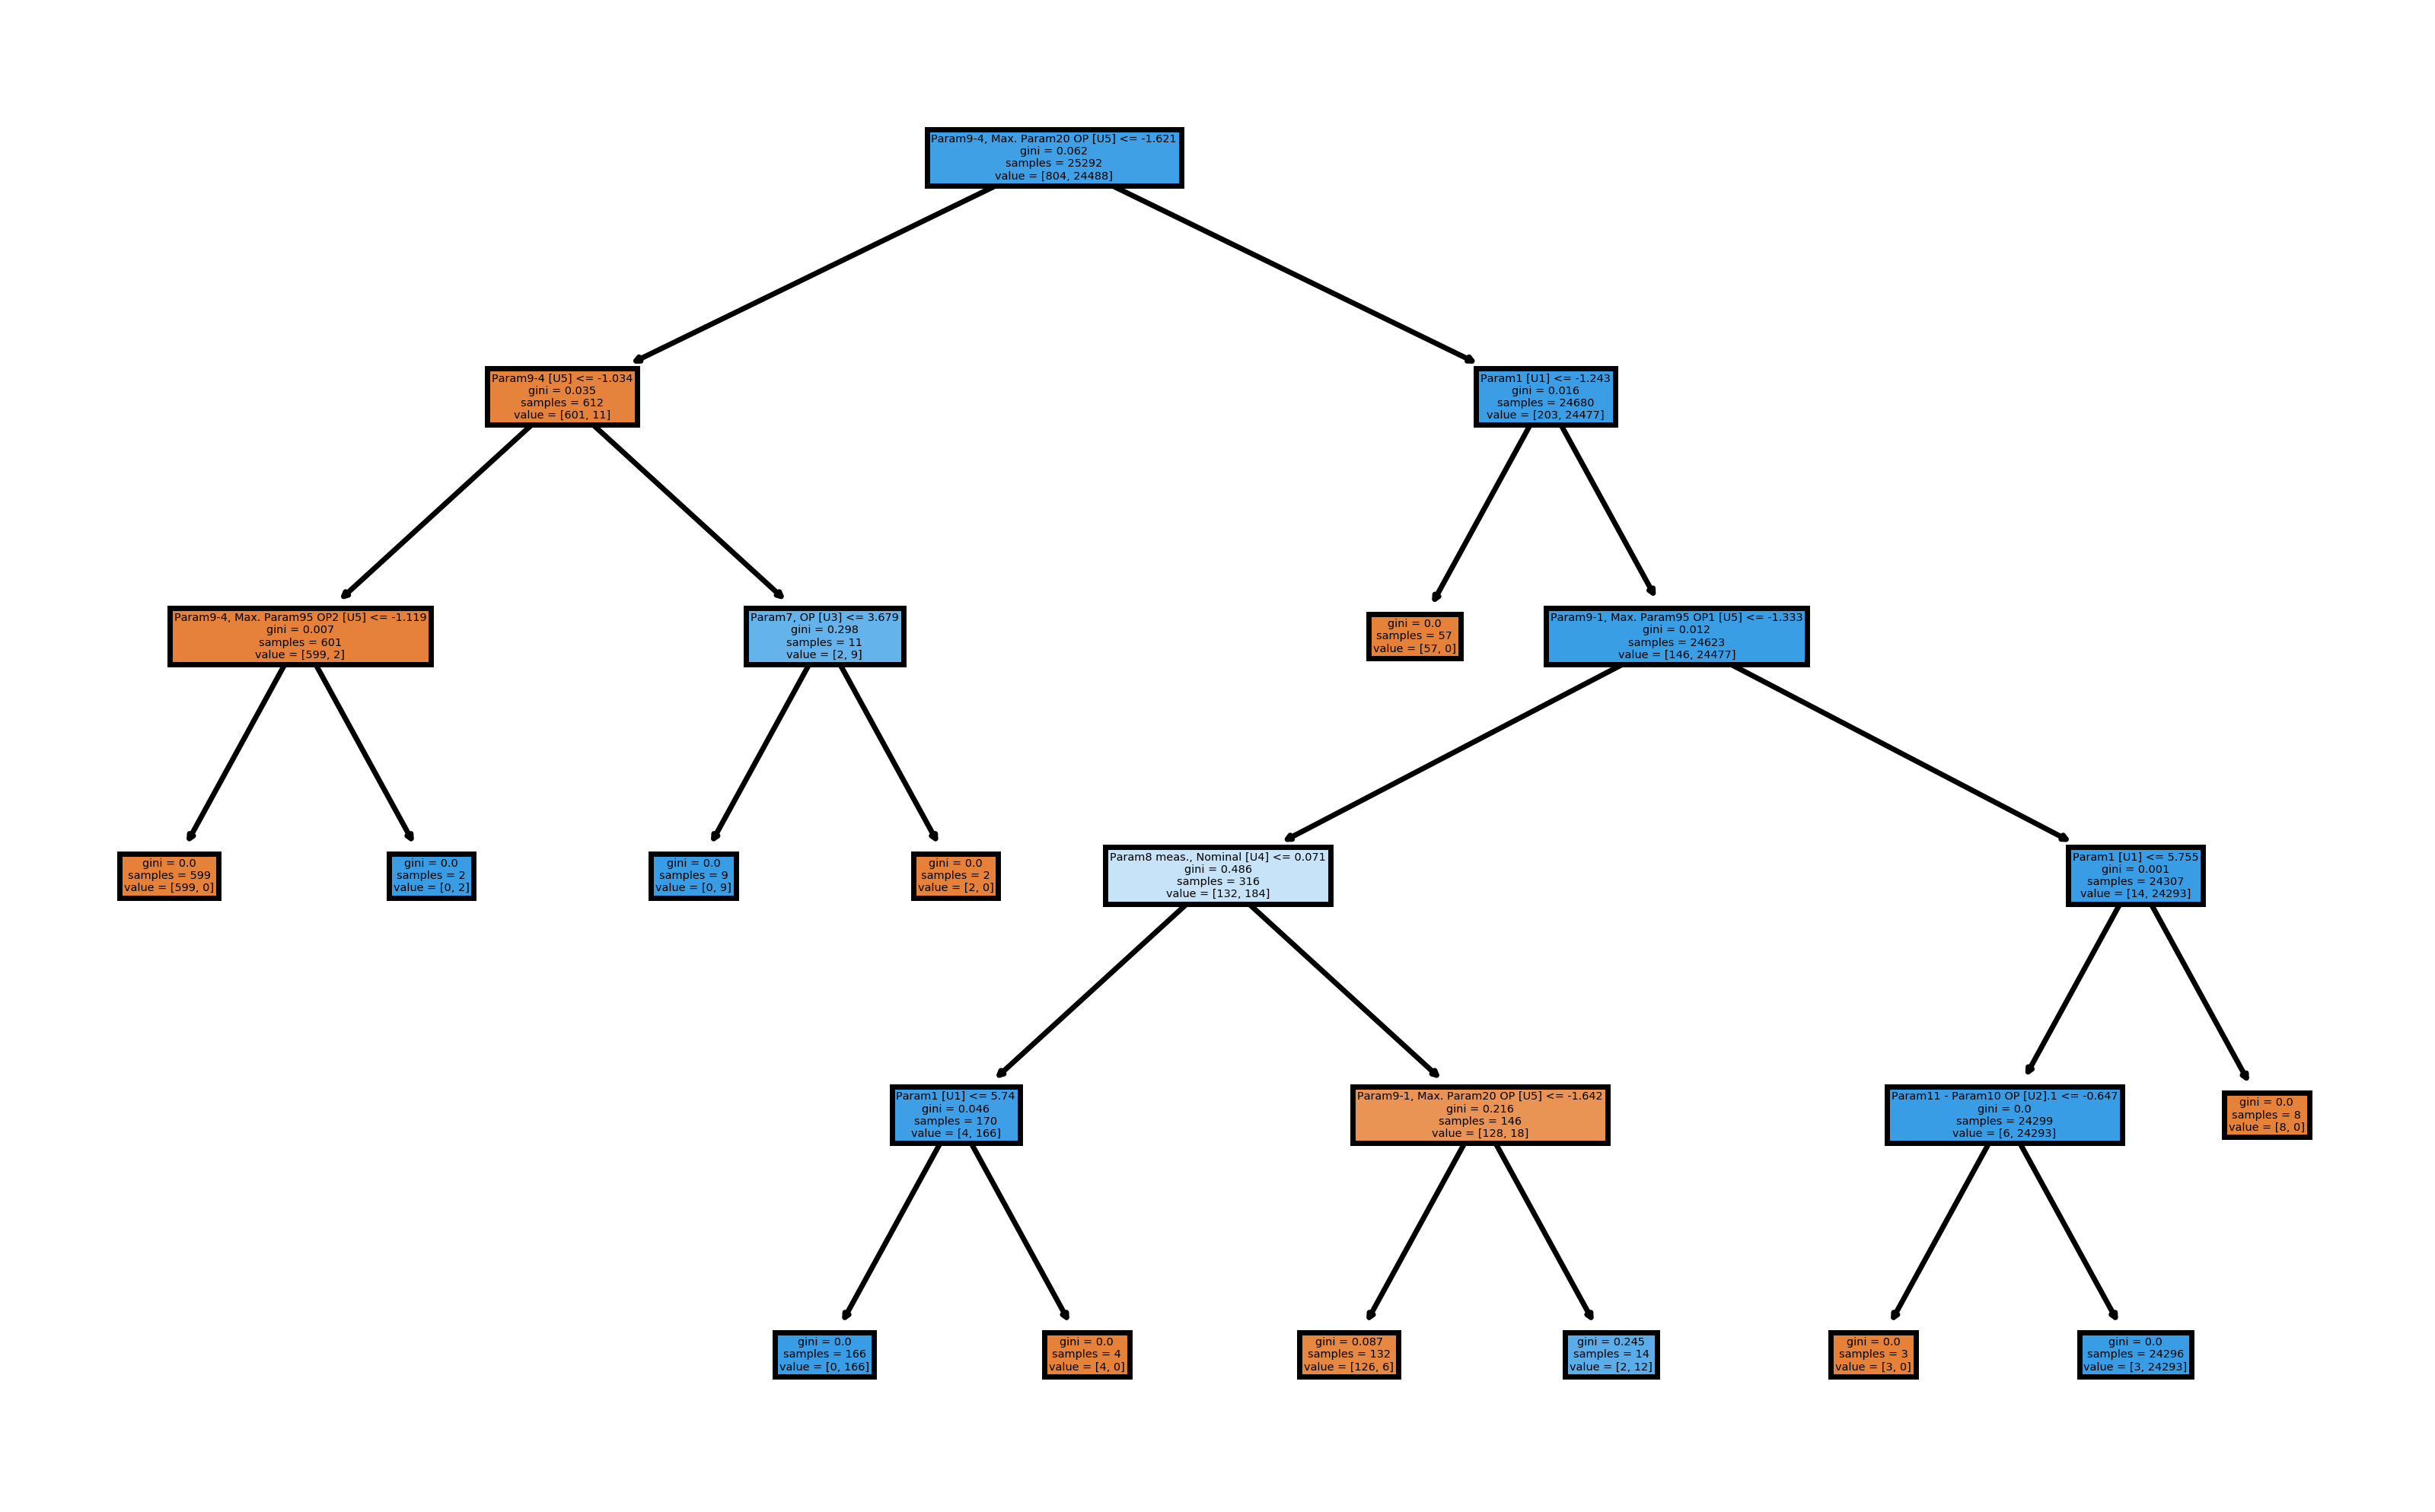

In [3]:
Image(filename='Trees/tree9.png') 

The tree is fairly convoluted and difficult to interpret directly, but let's consider the split choices:

1. Param9-4, Max. Param20 OP
2. Param9-4
    1. Param9-4, Max. Param95 OP2
    2. Param7
3. Param1
    1. Param9-1, Max. Param95 OP1
        1. Param8 meas., Nominal
            1. Param1
            2. Param9-1, Max. Param20 OP
        2. Param1
            1. Param11 - Param10 OP
            
What we can make out from the splits is that certain parameters show significant influence, particularly those related to Param9 and that channel dependent parameters are most critical from "-1" and "-4" with none of the other channels factoring into the decision tree.

### 2) Logistic Regression

Some additional conclusions can be drawn by considering the most influential parameters in the Logistic Regression based on magnitude of the coefficients. Having run the model multiple times we can stack up the results and get a sense of how prominent some parameters are as compared to others.

In all 6 iterations of the data the most-positive coefficient was Param9-1 and the most-negative coefficient was Param17. Every other parameter varied in it's rank-order from session to session so these two parameters stand out. Param17 is a critical measure of functionality and so the model has done well to pick up on that here but it is perhaps unsurprising.

Param9-1 is interesting becaues it is related specifically to a channel, 1. For the other channels 3 and 4 the parameters are negative and for channel 2 it tends to be close to zero.

|Feature|Coeffs v1|Coeffs v2|Coeffs v3|Coeffs v4|Coeffs v5|
|---|---|---|---|---|---|
|Param9-1|3.787|3.193|3.434|3.544|3.297|
|Param9-3|-0.118|0.085|0.078|0.511|0.104|
|Param9-5|-0.297|-0.685|-0.127|-0.487|-0.411|
|Param9-2|-1.273|-0.733|-1.326|-0.823|-0.664|
|Param9-4|-1.368|-1.497|-1.353|-1.636|-1.318|


The relative ordering of the channels in this fashion may be capturing something about the test setup or the relationship between channels because it's the same test and threshold. If, for example, a large value of Param9 was captured in the device specifications then all these parameters would be positive.

### 3) SVC and KNN

These two models each performed only as well as a naive model. The only real conclusion that can be drawn for these models is that they're likely inappropriate for fitting these data. 

As the ReadME notes: "32662 of the 33723 rows are passing and so a naive model would predict all devices pass and would have an accuracy of 96.8%." If these models can't best the results of a random guess then there is certainly no rationale for tolerating the dramatically longer fit times. 

Discarding these techniques for the sake of analyzing these datasets is most appropriate. They lack the appropriate accuracy and take more than 5X and 900X longer for KNN and SVC respectively than the Logistic Regression model.

### 4) Neural Network

An honourable mention here for a neural network which I attempted to train. I added up to 4 layers of 200 neurons each and regardless of neuron counts or number of layers the model failed to achieve greater than 4% accuracy. This seems to be an indication that neural networks like SVC and KNN models are perhaps inappropriate to model these data.

Consider the accuracy of the Neural Network that was trained over 100 epochs. They quickly converge to a value less than 4% and do not seem to get out of this locality.

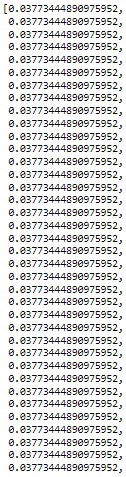

In [5]:
Image(filename='Plots/NN_Accuracy.png') 

## Summary Remarks

1. The Logistic Regression model is comparatively powerful for determining the final Pass/Fail disposition of assembled parts
2. The most influential parameter is Param9 (from both the Decision Tree and the Logistic Regression model)
3. Channels 1 and 4 are the most influential channels and the other channels are almost negligible
4. Param17 is (correctly) strongly correlated with performance, indicating that the model is capable of identifying critical test parameters



## Proposed Next Steps

The best way to improve this methodology is to integrate more data. These data were all taken from one assembly instance and we may find that if this dataset is an excursion then the model and conclusions may be invalid. Especially given the very short train times for logistic regression I think we could easily expand this dataset to be 10 - 100X larger and achieve much more robust answers.

I think that leave-one-out fitting could also help improve results here since there are many parameters that seem to have comparatively little influence over final performance. By iterating this process we could compose a list of parameters that are more or less negligible.

From the perspective of implementation I think it's worthwhile to instigate conversations about test-time reduction through dropping certain tests (for example testing channels 2 and 3 seems to be redundant).

The end-goal for this project is to implement it earlier in the production line and apply it to other elements of analysis. Originally it was the intention to include inspection criteria as a part of this project but the scope was too great to implement on first-pass. The pre-assembly inspection and test data could be informative for further inspection and test-time reduction. As the diagram at the top of this notebook indicates there is still a wealth of information which could be integrated into the model.

Finally, the last suggestion I have is to try and predict real-valued outcomes using linear regression models rather than strictly trying to classify performance. If a model could precisely predict the real-valued parameters then any arbitrary thresholds could be applied as pass/fail criteria rather than trying to fit them into the current pass/fail binnings. Logistic Regression, and classifier models in-general were utilized here for simplicity but as more data becomes available it will be interesting to see if these models can be more granular and predict real-valued metrics.